In [1]:

import src.grimoire as Grimoire
import src.decks as Decks
from src.by import By

kodama = "Kodama of the West Tree"
# mazzi = Decks.fetch(By.COMMANDER, kodama, n_thread=1)

# grim = Grimoire.load("OMNI") if Grimoire.load("OMNI",False) is not None else Grimoire().make_omni()
grim = Grimoire.fetch(By.COMMANDER, kodama)

Carico le carte dal grimorio di Kodama of the West Tree


In [2]:
from src.card import Filters
# Crea la matrice di correlazione
df = grim.dataframe( 
    positive_filters=[
        Filters.isLegalInCommander,
        # Filters.isCreature,
        # Filters.isGreen
        # Filters.isColorless
    ], 
    negative_filters=[
        Filters.isToken
        # Filters.isLegendary
    ],
    additional_data={
        # "is_creature": lambda card: int(Type.Creature.name in card.types),
        # "#keywords" : lambda card: len(card.keywords),
        # "#words" : lambda card: card.text.count(' ')+1,
        # "is_green": lambda card: int(card.color_identity['G']),
        # "is_black": lambda card: int(card.color_identity['B']),
        # "is_colorless": lambda card: int(all(not v for v in card.color_identity.values())),
        "is_legendary": lambda card: int("Legendary" in card.super_types),
        "#act_abilities": lambda card: card.count_active_abilities(),
        "#trigg_abilities": lambda card: card.count_trigger_abilities(),
        "mana_production": lambda card: card.abs_mana_production()
    })

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_scaled = df.copy()
scaler = StandardScaler()
# scaler = MinMaxScaler()
# scaler = RobustScaler()
df_scaled[numeric_cols] =  scaler.fit_transform(df[numeric_cols])
correlation_matrix = df_scaled.corr()

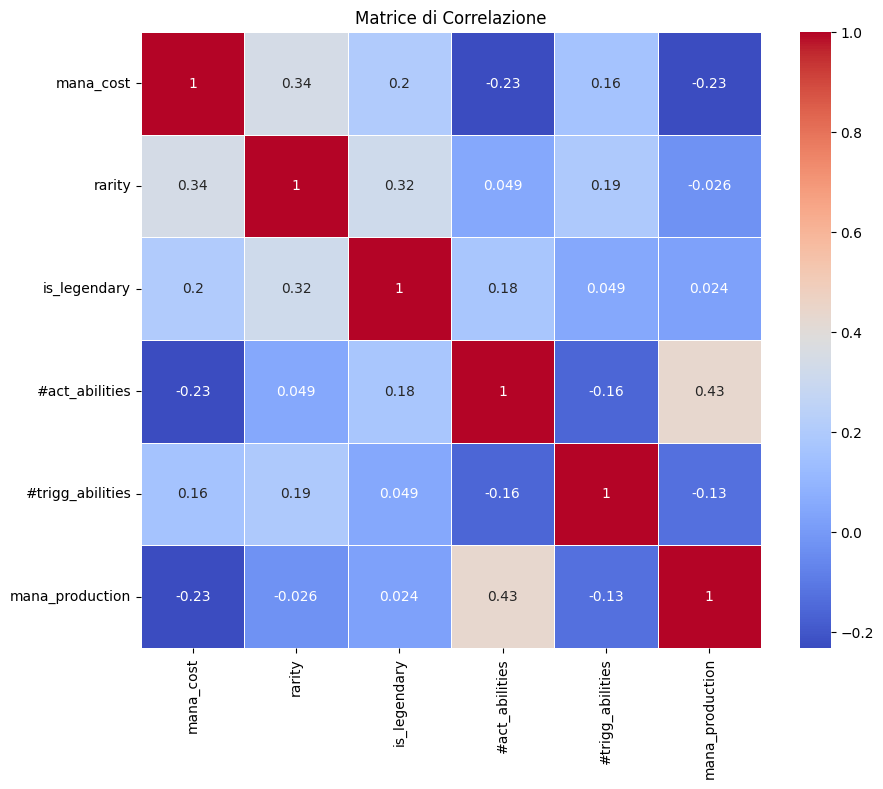

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
# Opzionalmente, crea una heatmap per visualizzare meglio la correlazione
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice di Correlazione')
plt.show()


In [5]:
def percentuale(count):
    return round(count/len(grim)*100,2)

print(f'Su un totale di {len(grim)} carte:')
for term, count in grim.vectorize().items():
    space = ' ' if len(str(percentuale(count))) <5 else ''
    print(f'{space}{percentuale(count)}%: {count} sono {term}')

Su un totale di 1030 carte:
 7.77%: 80 sono Land
10.29%: 106 sono Instant
41.94%: 432 sono Creature
15.83%: 163 sono Enchantment
11.55%: 119 sono Sorcery
14.76%: 152 sono Artifact
 1.36%: 14 sono Planeswalker
 0.19%: 2 sono Kindred
 0.19%: 2 sono Battle
 1.17%: 12 sono Token
